In [2]:
import pandas as pd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
import geopandas as gpd


In [794]:
#location = geolocator.reverse("-27.481517, 153.172730") ## transport .
#print(location.address)
#print((location.latitude, location.longitude))
#print(location.raw)

#data['geometry'][0].exterior.coords
#data['geometry'][1000].exterior.coords
#data['geometry'][0].exterior.coords.xy

#ext_points = []
#ext_points.extend(data['geometry'][0].exterior.coords[:-1])

#data[0:1]['geometry'].bounds
#data[2304:2305]['geometry'].total_bounds
#data[0:1]['geometry'].bounds

#data[0:1]['geometry'].bounds
#location.raw['boundingbox']

geolocator = Nominatim(user_agent="University of Queensland",timeout=10)

def return_post(data):
    
    #data['zipcode'] = 0
    zip_o=[]
    zip_d=[]
    boxo=[]
    boxd=[]
    for i in range(len(data)):            
        try:
            try:
                #tupo = (data.iloc[i]['yo_c'],data.iloc[i]['xo_c'])
                tupd = (data.iloc[i]['yd_c'],data.iloc[i]['xd_c'])
                #locationo = geolocator.reverse(tupo)
                locationd = geolocator.reverse(tupd)

                #zipo=locationo.raw['address']['postcode']
                #zip_o.append(zipo)
                
                zipd=locationd.raw['address']['postcode']
                zip_d.append(zipd)
                
                #if i%500 == 0:
                print(str(i) + ' th iteration completed')
            except KeyError:
                zip_d.append(0)
                #pass
            except AttributeError:    
                zip_d.append(0)
                #pass

            
        except GeocoderTimedOut:
            print('i sleep')
            time.sleep(20)
            return return_post(data)
            
        #geolocator = Nominatim(user_agent="err")
        
    #data['zipcode'][i] = zipcode

    return zip_d


In [29]:

# Set filepath
fp = "/Users/erensmacbook/Downloads/SA1_2021_AUST_SHP_GDA2020/SA1_2021_AUST_GDA2020.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)


In [82]:
qts2=pd.read_excel('/Users/erensmacbook/Downloads/2qts.xlsx')
qts5=pd.read_excel('/Users/erensmacbook/Downloads/5qts.xlsx')



In [83]:
qts2_t=qts2[['PERSID','AGEGROUP','SEX','WORKSTATUS','INDUSTRY']]
qts2_t=qts2_t[(qts2_t.INDUSTRY.isna() != True)] ## Ogrenci bilgileri icin mainact ve studying later

qts5_t=qts5[['PERSID','TRIPID',
      'ORIGPLACE','ORIGSA1_2021'
     ,'DESTPURP','DESTSA1_2021'
     ,'CUMDIST']]

real_data= pd.merge(qts2_t,qts5_t, on='PERSID')
real_data

,PERSID,AGEGROUP,SEX,WORKSTATUS,INDUSTRY,TRIPID,ORIGPLACE,ORIGSA1_2021,DESTPURP,DESTSA1_2021,CUMDIST
0,100001/1000,10,female,workFullTime,construction,1000011000001,My home,31603142717,Work (my workplace),31605143413,37.05
1,100001/1000,10,female,workFullTime,construction,1000011000002,Other work-related place,31605143413,Go home,31603142717,36.50
2,100001/1001,10,male,workFullTime,construction,1000011001001,My home,31603142717,Work (other work reason),31605143413,37.05
3,100001/1001,10,male,workFullTime,construction,1000011001002,Other work-related place,31605143413,Go home,31603142717,36.50
4,100001/1002,5,male,workFullTime,construction,1000011002001,My home,31603142717,Work (other work reason),31605143413,37.05
...,...,...,...,...,...,...,...,...,...,...,...
54643,99991/1001,12,male,workFullTime,transport,999911001001,My home,30103101509,Just accompanying someone,30501111001,18.94
54644,99991/1001,12,male,workFullTime,transport,999911001002,Other place (please specify),30501111001,Shopping,30301105142,9.18
54645,99991/1001,12,male,workFullTime,transport,999911001003,Shop or supermarket,30301105142,Go home,30103101509,12.83
54646,99991/1003,5,female,workPartTime,health,999911003001,My home,30103101509,Just accompanying someone,30103102031,1.83


In [245]:
#data
qld=data[data.STE_NAME21=='Queensland']
#qld[qld.SA1_CODE21 =='30601113925'];

qld_orig = qld[['SA1_CODE21','geometry']]
qld_dest = qld[['SA1_CODE21','geometry']]

qld_orig['SA1_CODE21']=qld_orig['SA1_CODE21'].astype(int)
qld_dest['SA1_CODE21']=qld_dest['SA1_CODE21'].astype(int)


qld_orig=qld_orig.rename(columns={"SA1_CODE21":"ORIGSA1_2021"})
qld_orig=qld_orig.rename(columns={"geometry":"geo_o"})

qld_dest=qld_dest.rename(columns={"SA1_CODE21":"DESTSA1_2021"})
qld_dest=qld_dest.rename(columns={"geometry":"geo_d"})




/Users/erensmacbook/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [283]:
train_data = pd.merge(real_data,qld_orig, on="ORIGSA1_2021")
train_data = pd.merge(train_data,qld_dest, on="DESTSA1_2021")


train_data['xo_c'] = train_data["geo_o"].apply(lambda x: (x.bounds[0]+x.bounds[2]) /2)
train_data['yo_c'] = train_data["geo_o"].apply(lambda x: (x.bounds[1]+x.bounds[3]) /2)

train_data['xd_c'] = train_data["geo_d"].apply(lambda x: (x.bounds[0]+x.bounds[2]) /2)
train_data['yd_c'] = train_data["geo_d"].apply(lambda x: (x.bounds[1]+x.bounds[3]) /2)


train_data = pd.DataFrame(train_data)
train_data

,PERSID,AGEGROUP,SEX,WORKSTATUS,INDUSTRY,TRIPID,ORIGPLACE,ORIGSA1_2021,DESTPURP,DESTSA1_2021,CUMDIST,geo_o,geo_d,xo_c,yo_c,xd_c,yd_c
0,100001/1000,10,female,workFullTime,construction,1000011000001,My home,31603142717,Work (my workplace),31605143413,37.05,"POLYGON ((153.09256 -26.66323, 153.09247 -26.6...","POLYGON ((153.08707 -26.39154, 153.08718 -26.3...",153.095916,-26.663484,153.083543,-26.395024
1,100001/1001,10,male,workFullTime,construction,1000011001001,My home,31603142717,Work (other work reason),31605143413,37.05,"POLYGON ((153.09256 -26.66323, 153.09247 -26.6...","POLYGON ((153.08707 -26.39154, 153.08718 -26.3...",153.095916,-26.663484,153.083543,-26.395024
2,100001/1002,5,male,workFullTime,construction,1000011002001,My home,31603142717,Work (other work reason),31605143413,37.05,"POLYGON ((153.09256 -26.66323, 153.09247 -26.6...","POLYGON ((153.08707 -26.39154, 153.08718 -26.3...",153.095916,-26.663484,153.083543,-26.395024
3,100492/1000,8,female,workFullTime,admin,1004921000003,Childcare or kindergarten,31605154417,Work (my workplace),31605143413,15.46,"POLYGON ((153.07441 -26.48170, 153.07440 -26.4...","POLYGON ((153.08707 -26.39154, 153.08718 -26.3...",153.078150,-26.484295,153.083543,-26.395024
4,27715/1000,9,female,workPartTime,health,277151000002,Primary or secondary school,31605154406,Recreation/leisure activity,31605143413,15.59,"POLYGON ((153.07527 -26.49046, 153.07531 -26.4...","POLYGON ((153.08707 -26.39154, 153.08718 -26.3...",153.076083,-26.492579,153.083543,-26.395024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54416,97957/1001,5,male,workFullTime,construction,979571001004,My workplace,30906125007,Work (my workplace),30903124009,22.22,"POLYGON ((153.34975 -28.05123, 153.34965 -28.0...","POLYGON ((153.38995 -27.91478, 153.39004 -27.9...",153.348985,-28.049699,153.391513,-27.915051
54417,9817/1000,9,male,workFullTime,other,98171000001,My home,31003128720,Recreation/leisure activity,31002127729,62.48,"POLYGON ((152.78048 -27.59259, 152.78095 -27.5...","POLYGON ((152.79462 -27.87712, 152.79460 -27.8...",152.786061,-27.592003,152.842196,-27.903625
54418,98999/1002,4,female,workPartTime,retail,989991002002,Someone else's home,30906124721,Social Visit,30703118509,160.43,"POLYGON ((153.33879 -28.01471, 153.33935 -28.0...","POLYGON ((152.28913 -28.33439, 152.28904 -28.3...",153.339051,-28.016738,152.294640,-28.333571
54419,9918/1000,9,male,workFullTime,other,99181000014,My home,30101100122,Recreation/leisure activity,30101100144,0.66,"POLYGON ((153.21124 -27.53324, 153.21178 -27.5...","POLYGON ((153.21674 -27.53655, 153.21878 -27.5...",153.212330,-27.534717,153.214322,-27.540259


In [299]:
#train_data.columns
#train_data['workflag']=train_data.apply(lambda x:1 if x['DESTPURP'] =='Work (my workplace)' else 0,axis=1)
#train_data['workflag']=train_data.apply(lambda x:1 if x['DESTPURP'] =='Work (other work reason)' else 0,axis=1)

#train_data['workflag'] =train_data.apply(lambda x:1 if x["DESTPURP"] =='Work (other work reason)' else 0)
#train_data['workflag'] =train_data.apply(lambda x:1 if x["DESTPURP"] =='Personal business' else 0)

#train_data
#hts_qld_final['INDUSTRY']=hts_qld_final.apply(lambda x:x['MAINACT'] if x['MAINACT'] =='Retired' else x['INDUSTRY'],axis=1)


In [329]:
train_data_1 = train_data[['AGEGROUP',
                         'SEX','INDUSTRY','ORIGPLACE','ORIGSA1_2021','DESTSA1_2021',
                         'xo_c','yo_c','xd_c','yd_c' ,'DESTPURP']]

train_data_1=train_data_1[(train_data_1.ORIGPLACE =='My home') ]
train_data_1=train_data_1[(train_data_1.DESTPURP =='Work (my workplace)' ) | (train_data_1.DESTPURP == 'Personal business' )
            |(train_data_1.DESTPURP == 'Work (other work reason)' )]

train_data_1 = train_data_1.drop(['ORIGPLACE','DESTPURP'],axis=1)

train_data_1

,AGEGROUP,SEX,INDUSTRY,ORIGSA1_2021,DESTSA1_2021,xo_c,yo_c,xd_c,yd_c
0,10,female,construction,31603142717,31605143413,153.095916,-26.663484,153.083543,-26.395024
1,10,male,construction,31603142717,31605143413,153.095916,-26.663484,153.083543,-26.395024
2,5,male,construction,31603142717,31605143413,153.095916,-26.663484,153.083543,-26.395024
5,10,female,accom,31605143821,31605143413,153.037579,-26.395248,153.083543,-26.395024
6,10,male,utilities,31607154831,31605143413,152.965905,-26.615799,153.083543,-26.395024
...,...,...,...,...,...,...,...,...,...
54390,7,female,retail,31104157103,31104132221,153.118544,-27.811504,153.109180,-27.778001
54391,7,male,construction,30902123418,30903123606,153.460683,-28.102574,153.405740,-27.933010
54407,6,male,construction,30907155742,30908126228,153.301815,-27.874648,153.405683,-28.080666
54414,10,female,health,30204104224,31402157718,153.049694,-27.291456,152.986691,-27.254239


In [331]:
train_data_1.to_excel( '/Users/erensmacbook/Desktop/hts_cord.xlsx',index= False)

In [348]:

####  #### ####  #### ####  ####                                                         #### ####  #### ####  ####
####  #### ####  #### ####  ####                                                         #### ####  #### ####  ####
####  #### ####  #### ####  ####                                                         #### ####  #### ####  ####


####  #### ####  #### ####  ####                 Results                                 #### ####  #### ####  ####



####  #### ####  #### ####  ####                                                         #### ####  #### ####  ####
####  #### ####  #### ####  ####                                                         #### ####  #### ####  ####
####  #### ####  #### ####  ####                                                         #### ####  #### ####  ####


In [742]:
synthetic_data_ct = pd.read_csv('/Users/erensmacbook/Desktop/cord-fakes/hts-cord-syn.csv',index_col=0)
synthetic_data_cop = pd.read_csv('/Users/erensmacbook/Desktop/cord-fakes/syn_cord.cop.csv')
synthetic_data_cop300 = pd.read_csv('/Users/erensmacbook/Desktop/cord-fakes/syn_cord_cop300.csv')

hma_p = pd.read_csv('/Users/erensmacbook/Desktop/cord-fakes/hma_p.csv')
hma_t = pd.read_csv('/Users/erensmacbook/Desktop/cord-fakes/hma_t.cop.csv')


In [745]:
synthetic_data_cop

,AGEGROUP,SEX,INDUSTRY,xo_c,yo_c,xd_c,yd_c
0,10,female,education,152.931716,-26.516340,152.963002,-26.753173
1,9,female,construction,153.026438,-26.694304,153.028164,-26.805857
2,10,male,health,153.073135,-27.479140,153.050418,-27.636217
3,10,male,construction,153.230236,-27.966572,153.295260,-28.040652
4,11,female,construction,153.018716,-27.254356,153.031295,-27.319954
...,...,...,...,...,...,...,...
11995,10,female,health,153.025597,-27.628677,153.351704,-27.322637
11996,7,male,health,153.008446,-27.490636,152.872756,-27.430099
11997,10,male,construction,153.196149,-27.921856,153.199067,-27.462380
11998,8,male,health,153.277584,-27.897994,153.272069,-27.928021


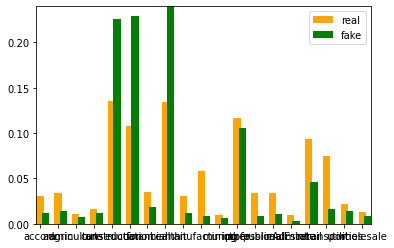

In [758]:
dist_a = train_data_1.groupby('INDUSTRY').size()
dist_b = synthetic_data_cop.groupby('INDUSTRY').size()
    
ax = plt.subplot(111)
index=dist_a.keys().to_list()

w=0.3
bar1=np.arange(len(index))
bar2= [i+w for i in bar1]

ax.bar(x=bar1 ,height=list(dist_a.values/dist_a.sum()), width=0.4, color='orange',label='real')
ax.bar(x=bar2 ,height=list(dist_b.values/dist_b.sum()), width=0.4, color='green',label='fake')

ax.autoscale(tight=True)
    
ind=list(dist_a.keys())
plt.xticks(range(len(ind)),ind)


plt.legend()
plt.show()

In [799]:
#train_zip_o,
train_zip_d  = return_post(synthetic_data_ct)

0 th iteration completed
1 th iteration completed
2 th iteration completed
4 th iteration completed
5 th iteration completed
6 th iteration completed
9 th iteration completed
10 th iteration completed
11 th iteration completed
13 th iteration completed
14 th iteration completed
15 th iteration completed
16 th iteration completed
17 th iteration completed
18 th iteration completed
19 th iteration completed
20 th iteration completed
21 th iteration completed
22 th iteration completed
23 th iteration completed
24 th iteration completed
25 th iteration completed
26 th iteration completed
27 th iteration completed
28 th iteration completed
29 th iteration completed
30 th iteration completed
31 th iteration completed
32 th iteration completed
33 th iteration completed
34 th iteration completed
35 th iteration completed
36 th iteration completed
38 th iteration completed
39 th iteration completed
40 th iteration completed
41 th iteration completed
42 th iteration completed
43 th iteration com

356 th iteration completed
357 th iteration completed
358 th iteration completed
359 th iteration completed
361 th iteration completed
362 th iteration completed
363 th iteration completed
364 th iteration completed
365 th iteration completed
366 th iteration completed
367 th iteration completed
368 th iteration completed
369 th iteration completed
370 th iteration completed
371 th iteration completed
373 th iteration completed
374 th iteration completed
375 th iteration completed
377 th iteration completed
378 th iteration completed
379 th iteration completed
380 th iteration completed
382 th iteration completed
383 th iteration completed
384 th iteration completed
385 th iteration completed
386 th iteration completed
387 th iteration completed
388 th iteration completed
389 th iteration completed
390 th iteration completed
391 th iteration completed
392 th iteration completed
393 th iteration completed
394 th iteration completed
395 th iteration completed
396 th iteration completed
3

705 th iteration completed
706 th iteration completed
707 th iteration completed
709 th iteration completed
710 th iteration completed
711 th iteration completed
712 th iteration completed
713 th iteration completed
714 th iteration completed
715 th iteration completed
716 th iteration completed
718 th iteration completed
719 th iteration completed
720 th iteration completed
721 th iteration completed
722 th iteration completed
723 th iteration completed
724 th iteration completed
725 th iteration completed
726 th iteration completed
728 th iteration completed
729 th iteration completed
730 th iteration completed
731 th iteration completed
732 th iteration completed
734 th iteration completed
735 th iteration completed
736 th iteration completed
737 th iteration completed
739 th iteration completed
740 th iteration completed
741 th iteration completed
743 th iteration completed
744 th iteration completed
745 th iteration completed
746 th iteration completed
747 th iteration completed
7

1056 th iteration completed
1057 th iteration completed
1058 th iteration completed
1060 th iteration completed
1061 th iteration completed
1062 th iteration completed
1063 th iteration completed
1064 th iteration completed
1065 th iteration completed
1066 th iteration completed
1067 th iteration completed
1068 th iteration completed
1069 th iteration completed
1070 th iteration completed
1071 th iteration completed
1072 th iteration completed
1073 th iteration completed
1074 th iteration completed
1075 th iteration completed
1076 th iteration completed
1081 th iteration completed
1082 th iteration completed
1083 th iteration completed
1084 th iteration completed
1085 th iteration completed
1086 th iteration completed
1087 th iteration completed
1088 th iteration completed
1089 th iteration completed
1090 th iteration completed
1091 th iteration completed
1092 th iteration completed
1094 th iteration completed
1095 th iteration completed
1096 th iteration completed
1097 th iteration co

1390 th iteration completed
1391 th iteration completed
1392 th iteration completed
1393 th iteration completed
1394 th iteration completed
1395 th iteration completed
1396 th iteration completed
1397 th iteration completed
1398 th iteration completed
1400 th iteration completed
1401 th iteration completed
1402 th iteration completed
1403 th iteration completed
1404 th iteration completed
1407 th iteration completed
1408 th iteration completed
1409 th iteration completed
1413 th iteration completed
1415 th iteration completed
1416 th iteration completed
1417 th iteration completed
1418 th iteration completed
1420 th iteration completed
1421 th iteration completed
1422 th iteration completed
1423 th iteration completed
1424 th iteration completed
1425 th iteration completed
1426 th iteration completed
1427 th iteration completed
1428 th iteration completed
1429 th iteration completed
1430 th iteration completed
1431 th iteration completed
1432 th iteration completed
1434 th iteration co

1732 th iteration completed
1733 th iteration completed
1735 th iteration completed
1736 th iteration completed
1737 th iteration completed
1738 th iteration completed
1741 th iteration completed
1743 th iteration completed
1744 th iteration completed
1745 th iteration completed
1746 th iteration completed
1747 th iteration completed
1750 th iteration completed
1751 th iteration completed
1752 th iteration completed
1755 th iteration completed
1756 th iteration completed
1757 th iteration completed
1758 th iteration completed
1759 th iteration completed
1760 th iteration completed
1762 th iteration completed
1763 th iteration completed
1764 th iteration completed
1765 th iteration completed
1766 th iteration completed
1767 th iteration completed
1769 th iteration completed
1770 th iteration completed
1771 th iteration completed
1772 th iteration completed
1773 th iteration completed
1774 th iteration completed
1775 th iteration completed
1776 th iteration completed
1777 th iteration co

2066 th iteration completed
2067 th iteration completed
2069 th iteration completed
2070 th iteration completed
2071 th iteration completed
2072 th iteration completed
2073 th iteration completed
2074 th iteration completed
2075 th iteration completed
2076 th iteration completed
2078 th iteration completed
2079 th iteration completed
2080 th iteration completed
2081 th iteration completed
2082 th iteration completed
2083 th iteration completed
2084 th iteration completed
2086 th iteration completed
2087 th iteration completed
2088 th iteration completed
2089 th iteration completed
2090 th iteration completed
2091 th iteration completed
2092 th iteration completed
2093 th iteration completed
2096 th iteration completed
2097 th iteration completed
2098 th iteration completed
2099 th iteration completed
2100 th iteration completed
2101 th iteration completed
2102 th iteration completed
2103 th iteration completed
2104 th iteration completed
2105 th iteration completed
2106 th iteration co

2402 th iteration completed
2403 th iteration completed
2404 th iteration completed
2405 th iteration completed
2406 th iteration completed
2407 th iteration completed
2408 th iteration completed
2409 th iteration completed
2410 th iteration completed
2411 th iteration completed
2412 th iteration completed
2413 th iteration completed
2414 th iteration completed
2415 th iteration completed
2416 th iteration completed
2417 th iteration completed
2418 th iteration completed
2419 th iteration completed
2420 th iteration completed
2422 th iteration completed
2423 th iteration completed
2424 th iteration completed
2425 th iteration completed
2426 th iteration completed
2427 th iteration completed
2428 th iteration completed
2430 th iteration completed
2431 th iteration completed
2432 th iteration completed
2433 th iteration completed
2435 th iteration completed
2436 th iteration completed
2437 th iteration completed
2438 th iteration completed
2439 th iteration completed
2440 th iteration co

2740 th iteration completed
2741 th iteration completed
2742 th iteration completed
2743 th iteration completed
2744 th iteration completed
2745 th iteration completed
2746 th iteration completed
2747 th iteration completed
2748 th iteration completed
2749 th iteration completed
2750 th iteration completed
2752 th iteration completed
2753 th iteration completed
2754 th iteration completed
2756 th iteration completed
2757 th iteration completed
2758 th iteration completed
2759 th iteration completed
2760 th iteration completed
2761 th iteration completed
2762 th iteration completed
2763 th iteration completed
2765 th iteration completed
2766 th iteration completed
2767 th iteration completed
2768 th iteration completed
2769 th iteration completed
2770 th iteration completed
2771 th iteration completed
2772 th iteration completed
2774 th iteration completed
2777 th iteration completed
2778 th iteration completed
2779 th iteration completed
2780 th iteration completed
2781 th iteration co

3056 th iteration completed
3058 th iteration completed
3059 th iteration completed
3060 th iteration completed
3061 th iteration completed
3062 th iteration completed
3063 th iteration completed
3064 th iteration completed
3065 th iteration completed
3067 th iteration completed
3068 th iteration completed
3070 th iteration completed
3071 th iteration completed
3072 th iteration completed
3073 th iteration completed
3074 th iteration completed
3075 th iteration completed
3077 th iteration completed
3078 th iteration completed
3079 th iteration completed
3080 th iteration completed
3082 th iteration completed
3083 th iteration completed
3084 th iteration completed
3085 th iteration completed
3086 th iteration completed
3087 th iteration completed
3089 th iteration completed
3090 th iteration completed
3091 th iteration completed
3092 th iteration completed
3093 th iteration completed
3094 th iteration completed
3095 th iteration completed
3096 th iteration completed
3097 th iteration co

3386 th iteration completed
3387 th iteration completed
3388 th iteration completed
3389 th iteration completed
3391 th iteration completed
3392 th iteration completed
3393 th iteration completed
3394 th iteration completed
3396 th iteration completed
3397 th iteration completed
3398 th iteration completed
3399 th iteration completed
3400 th iteration completed
3401 th iteration completed
3403 th iteration completed
3404 th iteration completed
3405 th iteration completed
3406 th iteration completed
3407 th iteration completed
3408 th iteration completed
3410 th iteration completed
3411 th iteration completed
3412 th iteration completed
3413 th iteration completed
3414 th iteration completed
3415 th iteration completed
3416 th iteration completed
3417 th iteration completed
3418 th iteration completed
3419 th iteration completed
3420 th iteration completed
3422 th iteration completed
3423 th iteration completed
3424 th iteration completed
3425 th iteration completed
3427 th iteration co

3723 th iteration completed
3725 th iteration completed
3726 th iteration completed
3727 th iteration completed
3728 th iteration completed
3729 th iteration completed
3730 th iteration completed
3731 th iteration completed
3732 th iteration completed
3733 th iteration completed
3734 th iteration completed
3736 th iteration completed
3737 th iteration completed
3738 th iteration completed
3739 th iteration completed
3740 th iteration completed
3741 th iteration completed
3742 th iteration completed
3743 th iteration completed
3744 th iteration completed
3745 th iteration completed
3747 th iteration completed
3748 th iteration completed
3749 th iteration completed
3750 th iteration completed
3751 th iteration completed
3752 th iteration completed
3753 th iteration completed
3755 th iteration completed
3756 th iteration completed
3757 th iteration completed
3758 th iteration completed
3760 th iteration completed
3762 th iteration completed
3763 th iteration completed
3764 th iteration co

4058 th iteration completed
4059 th iteration completed
4060 th iteration completed
4062 th iteration completed
4063 th iteration completed
4064 th iteration completed
4065 th iteration completed
4066 th iteration completed
4067 th iteration completed
4068 th iteration completed
4069 th iteration completed
4070 th iteration completed
4071 th iteration completed
4072 th iteration completed
4073 th iteration completed
4074 th iteration completed
4076 th iteration completed
4077 th iteration completed
4079 th iteration completed
4080 th iteration completed
4081 th iteration completed
4082 th iteration completed
4083 th iteration completed
4084 th iteration completed
4085 th iteration completed
4086 th iteration completed
4087 th iteration completed
4089 th iteration completed
4091 th iteration completed
4092 th iteration completed
4093 th iteration completed
4094 th iteration completed
4095 th iteration completed
4096 th iteration completed
4097 th iteration completed
4098 th iteration co

4402 th iteration completed
4403 th iteration completed
4405 th iteration completed
4407 th iteration completed
4409 th iteration completed
4410 th iteration completed
4411 th iteration completed
4412 th iteration completed
4413 th iteration completed
4414 th iteration completed
4415 th iteration completed
4416 th iteration completed
4417 th iteration completed
4418 th iteration completed
4419 th iteration completed
4420 th iteration completed
4421 th iteration completed
4422 th iteration completed
4423 th iteration completed
4424 th iteration completed
4425 th iteration completed
4426 th iteration completed
4427 th iteration completed
4428 th iteration completed
4429 th iteration completed
4430 th iteration completed
4431 th iteration completed
4432 th iteration completed
4433 th iteration completed
4434 th iteration completed
4435 th iteration completed
4437 th iteration completed
4438 th iteration completed
4439 th iteration completed
4440 th iteration completed
4441 th iteration co

4740 th iteration completed
4741 th iteration completed
4742 th iteration completed
4743 th iteration completed
4745 th iteration completed
4746 th iteration completed
4748 th iteration completed
4749 th iteration completed
4750 th iteration completed
4751 th iteration completed
4752 th iteration completed
4753 th iteration completed
4754 th iteration completed
4755 th iteration completed
4756 th iteration completed
4757 th iteration completed
4758 th iteration completed
4759 th iteration completed
4760 th iteration completed
4761 th iteration completed
4762 th iteration completed
4763 th iteration completed
4764 th iteration completed
4765 th iteration completed
4766 th iteration completed
4767 th iteration completed
4768 th iteration completed
4769 th iteration completed
4770 th iteration completed
4771 th iteration completed
4772 th iteration completed
4774 th iteration completed
4776 th iteration completed
4777 th iteration completed
4778 th iteration completed
4779 th iteration co

5065 th iteration completed
5066 th iteration completed
5067 th iteration completed
5068 th iteration completed
5069 th iteration completed
5070 th iteration completed
5073 th iteration completed
5074 th iteration completed
5075 th iteration completed
5076 th iteration completed
5077 th iteration completed
5079 th iteration completed
5080 th iteration completed
5081 th iteration completed
5082 th iteration completed
5083 th iteration completed
5085 th iteration completed
5087 th iteration completed
5088 th iteration completed
5089 th iteration completed
5090 th iteration completed
5091 th iteration completed
5092 th iteration completed
5093 th iteration completed
5094 th iteration completed
5095 th iteration completed
5096 th iteration completed
5097 th iteration completed
5099 th iteration completed
5100 th iteration completed
5101 th iteration completed
5102 th iteration completed
5103 th iteration completed
5105 th iteration completed
5106 th iteration completed
5107 th iteration co

5405 th iteration completed
5406 th iteration completed
5408 th iteration completed
5409 th iteration completed
5410 th iteration completed
5411 th iteration completed
5412 th iteration completed
5413 th iteration completed
5414 th iteration completed
5415 th iteration completed
5416 th iteration completed
5417 th iteration completed
5419 th iteration completed
5420 th iteration completed
5421 th iteration completed
5422 th iteration completed
5423 th iteration completed
5424 th iteration completed
5426 th iteration completed
5428 th iteration completed
5429 th iteration completed
5430 th iteration completed
5433 th iteration completed
5434 th iteration completed
5435 th iteration completed
5436 th iteration completed
5437 th iteration completed
5438 th iteration completed
5439 th iteration completed
5440 th iteration completed
5441 th iteration completed
5442 th iteration completed
5443 th iteration completed
5444 th iteration completed
5445 th iteration completed
5447 th iteration co

5744 th iteration completed
5745 th iteration completed
5746 th iteration completed
5747 th iteration completed
5748 th iteration completed
5749 th iteration completed
5750 th iteration completed
5751 th iteration completed
5753 th iteration completed
5754 th iteration completed
5755 th iteration completed
5756 th iteration completed
5757 th iteration completed
5758 th iteration completed
5759 th iteration completed
5761 th iteration completed
5762 th iteration completed
5763 th iteration completed
5764 th iteration completed
5765 th iteration completed
5767 th iteration completed
5768 th iteration completed
5769 th iteration completed
5770 th iteration completed
5771 th iteration completed
5772 th iteration completed
5775 th iteration completed
5776 th iteration completed
5777 th iteration completed
5779 th iteration completed
5780 th iteration completed
5781 th iteration completed
5782 th iteration completed
5783 th iteration completed
5784 th iteration completed
5785 th iteration co

6084 th iteration completed
6086 th iteration completed
6087 th iteration completed
6088 th iteration completed
6089 th iteration completed
6091 th iteration completed
6092 th iteration completed
6093 th iteration completed
6094 th iteration completed
6095 th iteration completed
6096 th iteration completed
6097 th iteration completed
6100 th iteration completed
6101 th iteration completed
6102 th iteration completed
6103 th iteration completed
6104 th iteration completed
6107 th iteration completed
6108 th iteration completed
6109 th iteration completed
6112 th iteration completed
6113 th iteration completed
6114 th iteration completed
6115 th iteration completed
6116 th iteration completed
6117 th iteration completed
6118 th iteration completed
6119 th iteration completed
6120 th iteration completed
6121 th iteration completed
6122 th iteration completed
6123 th iteration completed
6124 th iteration completed
6125 th iteration completed
6126 th iteration completed
6127 th iteration co

6419 th iteration completed
6420 th iteration completed
6421 th iteration completed
6422 th iteration completed
6423 th iteration completed
6424 th iteration completed
6426 th iteration completed
6427 th iteration completed
6428 th iteration completed
6429 th iteration completed
6430 th iteration completed
6431 th iteration completed
6432 th iteration completed
6433 th iteration completed
6434 th iteration completed
6435 th iteration completed
6436 th iteration completed
6438 th iteration completed
6439 th iteration completed
6440 th iteration completed
6442 th iteration completed
6443 th iteration completed
6444 th iteration completed
6445 th iteration completed
6446 th iteration completed
6447 th iteration completed
6448 th iteration completed
6449 th iteration completed
6450 th iteration completed
6451 th iteration completed
6452 th iteration completed
6453 th iteration completed
6454 th iteration completed
6455 th iteration completed
6456 th iteration completed
6457 th iteration co

6753 th iteration completed
6755 th iteration completed
6756 th iteration completed
6757 th iteration completed
6758 th iteration completed
6759 th iteration completed
6760 th iteration completed
6761 th iteration completed
6762 th iteration completed
6764 th iteration completed
6765 th iteration completed
6766 th iteration completed
6767 th iteration completed
6769 th iteration completed
6770 th iteration completed
6771 th iteration completed
6772 th iteration completed
6773 th iteration completed
6774 th iteration completed
6775 th iteration completed
6776 th iteration completed
6777 th iteration completed
6778 th iteration completed
6779 th iteration completed
6780 th iteration completed
6781 th iteration completed
6782 th iteration completed
6783 th iteration completed
6784 th iteration completed
6785 th iteration completed
6786 th iteration completed
6787 th iteration completed
6789 th iteration completed
6790 th iteration completed
6791 th iteration completed
6792 th iteration co

7081 th iteration completed
7082 th iteration completed
7084 th iteration completed
7085 th iteration completed
7087 th iteration completed
7088 th iteration completed
7089 th iteration completed
7090 th iteration completed
7091 th iteration completed
7093 th iteration completed
7094 th iteration completed
7095 th iteration completed
7096 th iteration completed
7097 th iteration completed
7098 th iteration completed
7099 th iteration completed
7100 th iteration completed
7101 th iteration completed
7105 th iteration completed
7106 th iteration completed
7107 th iteration completed
7108 th iteration completed
7109 th iteration completed
7110 th iteration completed
7111 th iteration completed
7112 th iteration completed
7113 th iteration completed
7115 th iteration completed
7116 th iteration completed
7117 th iteration completed
7118 th iteration completed
7119 th iteration completed
7120 th iteration completed
7121 th iteration completed
7122 th iteration completed
7123 th iteration co

7425 th iteration completed
7426 th iteration completed
7428 th iteration completed
7429 th iteration completed
7430 th iteration completed
7431 th iteration completed
7432 th iteration completed
7433 th iteration completed
7434 th iteration completed
7436 th iteration completed
7437 th iteration completed
7438 th iteration completed
7439 th iteration completed
7440 th iteration completed
7441 th iteration completed
7442 th iteration completed
7443 th iteration completed
7444 th iteration completed
7445 th iteration completed
7446 th iteration completed
7447 th iteration completed
7448 th iteration completed
7449 th iteration completed
7450 th iteration completed
7451 th iteration completed
7452 th iteration completed
7453 th iteration completed
7454 th iteration completed
7455 th iteration completed
7456 th iteration completed
7457 th iteration completed
7458 th iteration completed
7459 th iteration completed
7460 th iteration completed
7461 th iteration completed
7462 th iteration co

7756 th iteration completed
7757 th iteration completed
7759 th iteration completed
7760 th iteration completed
7761 th iteration completed
7762 th iteration completed
7763 th iteration completed
7764 th iteration completed
7765 th iteration completed
7766 th iteration completed
7767 th iteration completed
7768 th iteration completed
7769 th iteration completed
7770 th iteration completed
7771 th iteration completed
7772 th iteration completed
7773 th iteration completed
7775 th iteration completed
7776 th iteration completed
7777 th iteration completed
7779 th iteration completed
7780 th iteration completed
7781 th iteration completed
7782 th iteration completed
7785 th iteration completed
7786 th iteration completed
7787 th iteration completed
7788 th iteration completed
7789 th iteration completed
7790 th iteration completed
7791 th iteration completed
7792 th iteration completed
7793 th iteration completed
7795 th iteration completed
7796 th iteration completed
7798 th iteration co

8095 th iteration completed
8096 th iteration completed
8097 th iteration completed
8098 th iteration completed
8099 th iteration completed
8100 th iteration completed
8101 th iteration completed
8102 th iteration completed
8103 th iteration completed
8104 th iteration completed
8106 th iteration completed
8107 th iteration completed
8110 th iteration completed
8111 th iteration completed
8112 th iteration completed
8113 th iteration completed
8115 th iteration completed
8118 th iteration completed
8119 th iteration completed
8120 th iteration completed
8122 th iteration completed
8124 th iteration completed
8126 th iteration completed
8127 th iteration completed
8129 th iteration completed
8130 th iteration completed
8131 th iteration completed
8132 th iteration completed
8133 th iteration completed
8134 th iteration completed
8135 th iteration completed
8136 th iteration completed
8137 th iteration completed
8138 th iteration completed
8139 th iteration completed
8140 th iteration co

8437 th iteration completed
8439 th iteration completed
8440 th iteration completed
8442 th iteration completed
8443 th iteration completed
8444 th iteration completed
8445 th iteration completed
8446 th iteration completed
8447 th iteration completed
8448 th iteration completed
8449 th iteration completed
8450 th iteration completed
8451 th iteration completed
8452 th iteration completed
8453 th iteration completed
8454 th iteration completed
8455 th iteration completed
8456 th iteration completed
8457 th iteration completed
8458 th iteration completed
8459 th iteration completed
8460 th iteration completed
8461 th iteration completed
8462 th iteration completed
8463 th iteration completed
8464 th iteration completed
8465 th iteration completed
8466 th iteration completed
8467 th iteration completed
8468 th iteration completed
8469 th iteration completed
8470 th iteration completed
8471 th iteration completed
8472 th iteration completed
8473 th iteration completed
8474 th iteration co

8773 th iteration completed
8774 th iteration completed
8775 th iteration completed
8776 th iteration completed
8777 th iteration completed
8778 th iteration completed
8779 th iteration completed
8780 th iteration completed
8781 th iteration completed
8782 th iteration completed
8783 th iteration completed
8785 th iteration completed
8786 th iteration completed
8787 th iteration completed
8788 th iteration completed
8789 th iteration completed
8790 th iteration completed
8792 th iteration completed
8793 th iteration completed
8794 th iteration completed
8795 th iteration completed
8796 th iteration completed
8798 th iteration completed
8799 th iteration completed
8800 th iteration completed
8801 th iteration completed
8802 th iteration completed
8803 th iteration completed
8804 th iteration completed
8805 th iteration completed
8806 th iteration completed
8807 th iteration completed
8808 th iteration completed
8809 th iteration completed
8810 th iteration completed
8811 th iteration co

9109 th iteration completed
9110 th iteration completed
9111 th iteration completed
9112 th iteration completed
9113 th iteration completed
9115 th iteration completed
9116 th iteration completed
9117 th iteration completed
9118 th iteration completed
9119 th iteration completed
9120 th iteration completed
9121 th iteration completed
9122 th iteration completed
9123 th iteration completed
9124 th iteration completed
9125 th iteration completed
9126 th iteration completed
9127 th iteration completed
9128 th iteration completed
9129 th iteration completed
9130 th iteration completed
9131 th iteration completed
9132 th iteration completed
9133 th iteration completed
9134 th iteration completed
9135 th iteration completed
9136 th iteration completed
9137 th iteration completed
9138 th iteration completed
9139 th iteration completed
9140 th iteration completed
9141 th iteration completed
9142 th iteration completed
9144 th iteration completed
9145 th iteration completed
9146 th iteration co

9444 th iteration completed
9445 th iteration completed
9447 th iteration completed
9448 th iteration completed
9449 th iteration completed
9450 th iteration completed
9451 th iteration completed
9452 th iteration completed
9453 th iteration completed
9454 th iteration completed
9455 th iteration completed
9456 th iteration completed
9457 th iteration completed
9458 th iteration completed
9459 th iteration completed
9461 th iteration completed
9462 th iteration completed
9464 th iteration completed
9465 th iteration completed
9466 th iteration completed
9467 th iteration completed
9468 th iteration completed
9469 th iteration completed
9470 th iteration completed
9471 th iteration completed
9472 th iteration completed
9473 th iteration completed
9474 th iteration completed
9475 th iteration completed
9477 th iteration completed
9478 th iteration completed
9479 th iteration completed
9480 th iteration completed
9481 th iteration completed
9482 th iteration completed
9483 th iteration co

9777 th iteration completed
9779 th iteration completed
9780 th iteration completed
9782 th iteration completed
9783 th iteration completed
9784 th iteration completed
9785 th iteration completed
9786 th iteration completed
9787 th iteration completed
9788 th iteration completed
9789 th iteration completed
9790 th iteration completed
9791 th iteration completed
9792 th iteration completed
9793 th iteration completed
9794 th iteration completed
9795 th iteration completed
9796 th iteration completed
9797 th iteration completed
9798 th iteration completed
9800 th iteration completed
9804 th iteration completed
9805 th iteration completed
9806 th iteration completed
9807 th iteration completed
9808 th iteration completed
9810 th iteration completed
9811 th iteration completed
9812 th iteration completed
9813 th iteration completed
9814 th iteration completed
9815 th iteration completed
9816 th iteration completed
9817 th iteration completed
9818 th iteration completed
9819 th iteration co

10112 th iteration completed
10113 th iteration completed
10114 th iteration completed
10115 th iteration completed
10116 th iteration completed
10117 th iteration completed
10118 th iteration completed
10119 th iteration completed
10121 th iteration completed
10122 th iteration completed
10124 th iteration completed
10125 th iteration completed
10126 th iteration completed
10127 th iteration completed
10128 th iteration completed
10129 th iteration completed
10130 th iteration completed
10131 th iteration completed
10132 th iteration completed
10133 th iteration completed
10134 th iteration completed
10135 th iteration completed
10136 th iteration completed
10137 th iteration completed
10138 th iteration completed
10140 th iteration completed
10141 th iteration completed
10142 th iteration completed
10143 th iteration completed
10144 th iteration completed
10145 th iteration completed
10146 th iteration completed
10147 th iteration completed
10148 th iteration completed
10149 th itera

10432 th iteration completed
10433 th iteration completed
10434 th iteration completed
10435 th iteration completed
10436 th iteration completed
10437 th iteration completed
10438 th iteration completed
10440 th iteration completed
10441 th iteration completed
10442 th iteration completed
10443 th iteration completed
10444 th iteration completed
10445 th iteration completed
10446 th iteration completed
10447 th iteration completed
10448 th iteration completed
10449 th iteration completed
10451 th iteration completed
10452 th iteration completed
10453 th iteration completed
10454 th iteration completed
10455 th iteration completed
10456 th iteration completed
10458 th iteration completed
10459 th iteration completed
10460 th iteration completed
10461 th iteration completed
10462 th iteration completed
10463 th iteration completed
10464 th iteration completed
10465 th iteration completed
10466 th iteration completed
10467 th iteration completed
10468 th iteration completed
10469 th itera

10764 th iteration completed
10765 th iteration completed
10766 th iteration completed
10767 th iteration completed
10768 th iteration completed
10769 th iteration completed
10770 th iteration completed
10771 th iteration completed
10772 th iteration completed
10773 th iteration completed
10774 th iteration completed
10776 th iteration completed
10777 th iteration completed
10778 th iteration completed
10779 th iteration completed
10781 th iteration completed
10782 th iteration completed
10783 th iteration completed
10784 th iteration completed
10785 th iteration completed
10786 th iteration completed
10787 th iteration completed
10788 th iteration completed
10789 th iteration completed
10790 th iteration completed
10791 th iteration completed
10792 th iteration completed
10793 th iteration completed
10794 th iteration completed
10795 th iteration completed
10797 th iteration completed
10798 th iteration completed
10799 th iteration completed
10800 th iteration completed
10801 th itera

11087 th iteration completed
11088 th iteration completed
11089 th iteration completed
11090 th iteration completed
11091 th iteration completed
11092 th iteration completed
11094 th iteration completed
11095 th iteration completed
11096 th iteration completed
11097 th iteration completed
11098 th iteration completed
11099 th iteration completed
11100 th iteration completed
11101 th iteration completed
11103 th iteration completed
11104 th iteration completed
11105 th iteration completed
11106 th iteration completed
11107 th iteration completed
11108 th iteration completed
11109 th iteration completed
11110 th iteration completed
11111 th iteration completed
11112 th iteration completed
11113 th iteration completed
11114 th iteration completed
11115 th iteration completed
11116 th iteration completed
11117 th iteration completed
11120 th iteration completed
11121 th iteration completed
11122 th iteration completed
11123 th iteration completed
11124 th iteration completed
11125 th itera

11407 th iteration completed
11408 th iteration completed
11409 th iteration completed
11410 th iteration completed
11411 th iteration completed
11412 th iteration completed
11414 th iteration completed
11415 th iteration completed
11416 th iteration completed
11418 th iteration completed
11419 th iteration completed
11420 th iteration completed
11421 th iteration completed
11422 th iteration completed
11423 th iteration completed
11424 th iteration completed
11425 th iteration completed
11426 th iteration completed
11427 th iteration completed
11428 th iteration completed
11429 th iteration completed
11431 th iteration completed
11432 th iteration completed
11433 th iteration completed
11434 th iteration completed
11435 th iteration completed
11436 th iteration completed
11437 th iteration completed
11438 th iteration completed
11439 th iteration completed
11440 th iteration completed
11441 th iteration completed
11443 th iteration completed
11444 th iteration completed
11445 th itera

11733 th iteration completed
11734 th iteration completed
11736 th iteration completed
11737 th iteration completed
11739 th iteration completed
11740 th iteration completed
11741 th iteration completed
11742 th iteration completed
11743 th iteration completed
11744 th iteration completed
11745 th iteration completed
11746 th iteration completed
11748 th iteration completed
11749 th iteration completed
11750 th iteration completed
11751 th iteration completed
11752 th iteration completed
11755 th iteration completed
11756 th iteration completed
11757 th iteration completed
11758 th iteration completed
11760 th iteration completed
11761 th iteration completed
11762 th iteration completed
11763 th iteration completed
11764 th iteration completed
11765 th iteration completed
11766 th iteration completed
11767 th iteration completed
11768 th iteration completed
11769 th iteration completed
11770 th iteration completed
11774 th iteration completed
11775 th iteration completed
11776 th itera

12055 th iteration completed
12056 th iteration completed
12057 th iteration completed
12059 th iteration completed
12060 th iteration completed
12061 th iteration completed
12062 th iteration completed
12063 th iteration completed
12066 th iteration completed
12067 th iteration completed
12068 th iteration completed
12069 th iteration completed
12070 th iteration completed
12072 th iteration completed
12073 th iteration completed
12074 th iteration completed
12075 th iteration completed
12076 th iteration completed
12077 th iteration completed
12078 th iteration completed
12079 th iteration completed
12080 th iteration completed
12081 th iteration completed
12082 th iteration completed
12083 th iteration completed
12084 th iteration completed
12085 th iteration completed
12086 th iteration completed
12087 th iteration completed
12088 th iteration completed
12089 th iteration completed
12090 th iteration completed
12091 th iteration completed
12092 th iteration completed
12093 th itera

12376 th iteration completed
12377 th iteration completed
12378 th iteration completed
12379 th iteration completed
12380 th iteration completed
12381 th iteration completed
12382 th iteration completed
12383 th iteration completed
12385 th iteration completed
12386 th iteration completed
12387 th iteration completed
12388 th iteration completed
12389 th iteration completed
12390 th iteration completed
12391 th iteration completed
12393 th iteration completed
12394 th iteration completed
12395 th iteration completed
12397 th iteration completed
12398 th iteration completed
12399 th iteration completed
12401 th iteration completed
12402 th iteration completed
12403 th iteration completed
12406 th iteration completed
12408 th iteration completed
12409 th iteration completed
12410 th iteration completed
12411 th iteration completed
12412 th iteration completed
12413 th iteration completed
12414 th iteration completed
12415 th iteration completed
12416 th iteration completed
12418 th itera

12695 th iteration completed
12696 th iteration completed
12697 th iteration completed
12698 th iteration completed
12699 th iteration completed
12701 th iteration completed
12702 th iteration completed
12703 th iteration completed
12704 th iteration completed
12705 th iteration completed
12706 th iteration completed
12707 th iteration completed
12708 th iteration completed
12709 th iteration completed
12710 th iteration completed
12711 th iteration completed
12712 th iteration completed
12713 th iteration completed
12714 th iteration completed
12715 th iteration completed
12716 th iteration completed
12717 th iteration completed
12718 th iteration completed
12719 th iteration completed
12720 th iteration completed
12722 th iteration completed
12723 th iteration completed
12724 th iteration completed
12725 th iteration completed
12726 th iteration completed
12727 th iteration completed
12729 th iteration completed
12730 th iteration completed
12731 th iteration completed
12732 th itera

13015 th iteration completed
13016 th iteration completed
13018 th iteration completed
13019 th iteration completed
13020 th iteration completed
13021 th iteration completed
13022 th iteration completed
13024 th iteration completed
13025 th iteration completed
13026 th iteration completed
13028 th iteration completed
13029 th iteration completed
13030 th iteration completed
13032 th iteration completed
13034 th iteration completed
13035 th iteration completed
13036 th iteration completed
13037 th iteration completed
13039 th iteration completed
13040 th iteration completed
13042 th iteration completed
13043 th iteration completed
13044 th iteration completed
13045 th iteration completed
13046 th iteration completed
13047 th iteration completed
13048 th iteration completed
13049 th iteration completed
13050 th iteration completed
13051 th iteration completed
13052 th iteration completed
13053 th iteration completed
13054 th iteration completed
13055 th iteration completed
13057 th itera

13338 th iteration completed
13339 th iteration completed
13341 th iteration completed
13343 th iteration completed
13344 th iteration completed
13345 th iteration completed
13346 th iteration completed
13347 th iteration completed
13348 th iteration completed
13350 th iteration completed
13352 th iteration completed
13353 th iteration completed
13354 th iteration completed
13355 th iteration completed
13356 th iteration completed
13357 th iteration completed
13358 th iteration completed
13359 th iteration completed
13360 th iteration completed
13361 th iteration completed
13362 th iteration completed
13363 th iteration completed
13364 th iteration completed
13366 th iteration completed
13367 th iteration completed
13369 th iteration completed
13370 th iteration completed
13371 th iteration completed
13372 th iteration completed
13373 th iteration completed
13374 th iteration completed
13375 th iteration completed
13376 th iteration completed
13377 th iteration completed
13379 th itera

13678 th iteration completed
13679 th iteration completed
13680 th iteration completed
13681 th iteration completed
13682 th iteration completed
13683 th iteration completed
13684 th iteration completed
13685 th iteration completed
13686 th iteration completed
13687 th iteration completed
13688 th iteration completed
13689 th iteration completed
13690 th iteration completed
13691 th iteration completed
13692 th iteration completed
13693 th iteration completed
13694 th iteration completed
13695 th iteration completed
13696 th iteration completed
13697 th iteration completed
13698 th iteration completed
13699 th iteration completed
13700 th iteration completed
13701 th iteration completed
13702 th iteration completed
13703 th iteration completed
13704 th iteration completed
13706 th iteration completed
13707 th iteration completed
13708 th iteration completed
13709 th iteration completed
13710 th iteration completed
13711 th iteration completed
13712 th iteration completed
13713 th itera

14001 th iteration completed
14002 th iteration completed
14004 th iteration completed
14005 th iteration completed
14006 th iteration completed
14007 th iteration completed
14008 th iteration completed
14009 th iteration completed
14010 th iteration completed
14011 th iteration completed
14012 th iteration completed
14014 th iteration completed
14015 th iteration completed
14016 th iteration completed
14017 th iteration completed
14018 th iteration completed
14019 th iteration completed
14020 th iteration completed
14021 th iteration completed
14022 th iteration completed
14023 th iteration completed
14024 th iteration completed
14025 th iteration completed
14026 th iteration completed
14027 th iteration completed
14028 th iteration completed
14029 th iteration completed
14030 th iteration completed
14031 th iteration completed
14032 th iteration completed
14033 th iteration completed
14034 th iteration completed
14035 th iteration completed
14036 th iteration completed
14037 th itera

14324 th iteration completed
14327 th iteration completed
14328 th iteration completed
14329 th iteration completed
14330 th iteration completed
14331 th iteration completed
14332 th iteration completed
14333 th iteration completed
14336 th iteration completed
14337 th iteration completed
14338 th iteration completed
14339 th iteration completed
14340 th iteration completed
14341 th iteration completed
14342 th iteration completed
14343 th iteration completed
14344 th iteration completed
14346 th iteration completed
14347 th iteration completed
14348 th iteration completed
14349 th iteration completed
14350 th iteration completed
14351 th iteration completed
14352 th iteration completed
14353 th iteration completed
14354 th iteration completed
14356 th iteration completed
14357 th iteration completed
14358 th iteration completed
14359 th iteration completed
14360 th iteration completed
14361 th iteration completed
14362 th iteration completed
14363 th iteration completed
14364 th itera

14648 th iteration completed
14649 th iteration completed
14651 th iteration completed
14652 th iteration completed
14653 th iteration completed
14654 th iteration completed
14655 th iteration completed
14656 th iteration completed
14657 th iteration completed
14658 th iteration completed
14659 th iteration completed
14660 th iteration completed
14661 th iteration completed
14662 th iteration completed
14663 th iteration completed
14666 th iteration completed
14667 th iteration completed
14668 th iteration completed
14669 th iteration completed
14670 th iteration completed
14673 th iteration completed
14674 th iteration completed
14675 th iteration completed
14676 th iteration completed
14677 th iteration completed
14678 th iteration completed
14679 th iteration completed
14680 th iteration completed
14681 th iteration completed
14682 th iteration completed
14683 th iteration completed
14684 th iteration completed
14685 th iteration completed
14686 th iteration completed
14687 th itera

14969 th iteration completed
14970 th iteration completed
14971 th iteration completed
14972 th iteration completed
14974 th iteration completed
14975 th iteration completed
14976 th iteration completed
14977 th iteration completed
14978 th iteration completed
14979 th iteration completed
14980 th iteration completed
14981 th iteration completed
14982 th iteration completed
14984 th iteration completed
14986 th iteration completed
14987 th iteration completed
14988 th iteration completed
14989 th iteration completed
14990 th iteration completed
14991 th iteration completed
14992 th iteration completed
14993 th iteration completed
14994 th iteration completed
14995 th iteration completed
14996 th iteration completed
14997 th iteration completed
14998 th iteration completed
14999 th iteration completed


In [793]:
#len(train_zip_o)

11096

In [800]:
#train_data_1['zips_o'] = train_zip_o
synthetic_data_ct['zips_d'] = train_zip_d

In [798]:
train_data_1.to_excel( '/Users/erensmacbook/Desktop/train_data_1_zipsd.xlsx',index= False)

In [ ]:
## train a ile ayniysa, not that bad !

In [716]:
a.reset_index().groupby(['INDUSTRY','zips'])['index'].count().reset_index().sort_values(by=['index'],ascending=False).head(50)


,INDUSTRY,zips,index
7,health,4998,162
11,other,4998,134
4,construction,4998,66
8,it,4998,66
5,education,4998,60
6,financial,4998,58
1,admin,4998,58
16,transport,4998,57
17,utilities,4998,37
15,retail,4998,32


In [706]:
synthetic_data_ct.reset_index().groupby(['INDUSTRY','zips'])['index'].count().reset_index().sort_values(by=['index'],ascending=False).head(30)


,INDUSTRY,zips,index
944,health,0,341
1434,other,0,286
1126,health,4998,162
456,construction,0,150
618,education,0,150
0,accom,0,139
1881,retail,0,136
1609,other,4998,134
2044,transport,0,106
132,admin,0,102


In [802]:
train_data_1.reset_index().groupby(['INDUSTRY','zips_d'])['index'].count().reset_index().sort_values(by=['index'],ascending=False).head(25)


,INDUSTRY,zips_d,index
369,construction,0,113
1241,other,0,80
1838,transport,4009,76
925,health,4305,76
849,health,4101,64
1507,publicAdmin,4004,61
666,education,4305,60
965,health,4575,56
1098,manufacturing,4076,56
1245,other,4004,55


In [803]:
synthetic_data_ct.reset_index().groupby(['INDUSTRY','zips_d'])['index'].count().reset_index().sort_values(by=['index'],ascending=False).head(25)


,INDUSTRY,zips_d,index
929,health,0,373
1414,other,0,283
0,accom,0,178
1841,retail,0,178
1106,health,4998,177
611,education,0,169
446,construction,0,155
1590,other,4998,129
2011,transport,0,102
130,admin,0,94


,AGEGROUP,SEX,INDUSTRY,xo_c,yo_c,xd_c,yd_c,zips_d
0,8,female,transport,153.117279,-27.574622,153.064512,-27.642532,4116
1,4,male,retail,153.128599,-27.579400,153.172730,-27.481517,4179
2,6,male,retail,153.441077,-27.910362,153.379565,-28.003513,4217
3,10,female,education,152.962794,-27.303586,153.029141,-27.088760,0
4,8,female,other,153.106155,-26.628543,153.102949,-26.787950,4551
...,...,...,...,...,...,...,...,...
14995,9,female,accom,152.966892,-27.213075,152.969991,-26.711456,4555
14996,4,female,retail,152.920876,-27.185165,153.020742,-27.170032,4508
14997,7,male,manufacturing,152.931453,-27.383552,152.960181,-27.468837,4065
14998,11,male,accom,152.994312,-27.681398,152.941301,-27.468593,4062


In [841]:
#train_data['dest_pt'] 
from shapely.geometry import Polygon, MultiPoint , Point
from math import ceil

train_data_1['orig_pt']=train_data_1.apply(lambda x: Point( (x['xo_c'],x['yo_c'])) ,axis=1 )
train_data_1['dest_pt']=train_data_1.apply(lambda x: Point( (x['xd_c'],x['yd_c'])) ,axis=1 )

synthetic_data_ct['orig_pt']=synthetic_data_ct.apply(lambda x: Point((x['xo_c'],x['yo_c'])) ,axis=1 )
synthetic_data_ct['dest_pt']=synthetic_data_ct.apply(lambda x: Point((x['xd_c'],x['yd_c'])) ,axis=1 )


In [845]:
synthetic_data_ct['distance']=synthetic_data_ct.apply(lambda x: (x['orig_pt'].distance(x['dest_pt'])) ,axis=1 )
train_data_1['distance']=train_data_1.apply(lambda x: (x['orig_pt'].distance(x['dest_pt'])) ,axis=1 )


In [877]:
synthetic_data_ct.distance.max()

1.8522882914502699

In [855]:
train_data_1.distance.max()

6.140891937539893

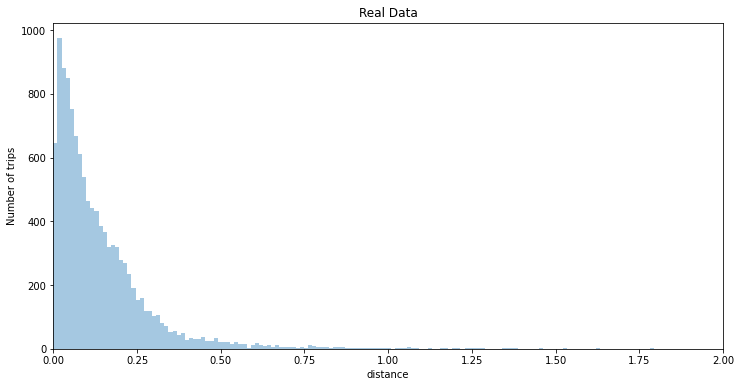

In [917]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.xlim(0,2)

plt.title('Real Data')
plt.xlabel('Distance')
plt.ylabel('Number of trips')
sns.distplot(train_data_1['distance'],bins=500,kde=False)

plt.show()

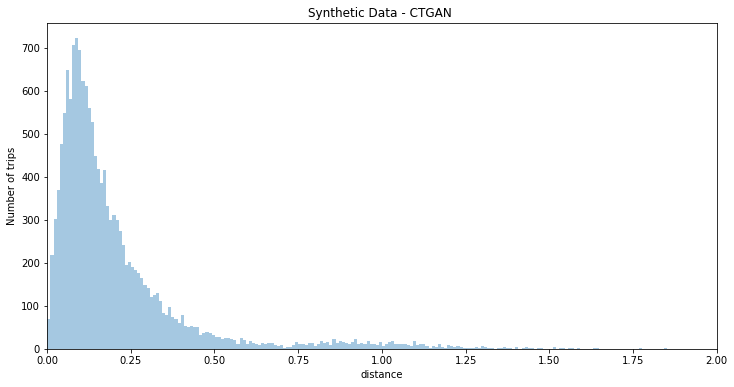

In [918]:
plt.figure(figsize=(12,6))
plt.xlim(0,2)

plt.title('Synthetic Data - CTGAN ')
plt.xlabel('Distance')
plt.ylabel('Number of trips')
sns.distplot(synthetic_data_ct['distance'],bins=200,kde=False)
plt.show()

/Users/erensmacbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/erensmacbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


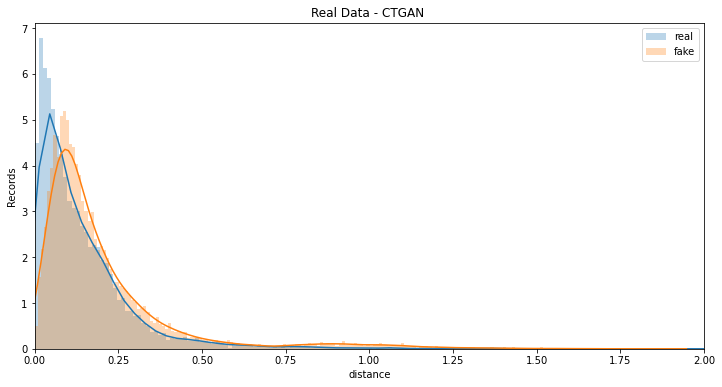

<Figure size 432x288 with 0 Axes>

In [920]:
plt.figure(figsize=(12,6))
plt.xlim(0,2)

plt.xlabel('Price')
plt.ylabel('Records')
plt.title('Real Data - CTGAN ')

sns.distplot(train_data_1['distance'],bins=500,hist_kws=dict(alpha=0.3),label='real')
sns.distplot(synthetic_data_ct['distance'],bins=200,hist_kws=dict(alpha=0.3),label='fake')

plt.legend()
plt.show()
plt.savefig('hist1.png')
